# Análisis de componentes principales sobre indicadores sociales en México y su relación con los resultados de la prueba PISA en matemáticas

## ¿Qué son los indicadores sociales?

Los indicadores sociales son un conjunto de medidas cuantitativas que se utilizan para evaluar el desempeño social de un país. Estos indicadores pueden abarcar una amplia gama de temas, como la salud, la educación, la economía, el empleo, la pobreza, la desigualdad, la violencia, el bienestar social, entre otros. La idea es que los indicadores sociales permitan identificar las fortalezas y debilidades de un país en relación a su desarrollo social, y que proporcionen información valiosa para la toma de decisiones y la implementación de políticas públicas encaminadas a mejorar el bienestar de la sociedad.

## ¿Qué es la prueba PISA en matemáticas?

La prueba PISA es una evaluación a nivel internacional que se lleva a cabo cada tres años para medir el rendimiento académico de los estudiantes de 15 años en tres áreas: lectura, ciencias y matemáticas. La prueba PISA en matemáticas mide las habilidades y conocimientos de los estudiantes en matemáticas, y evalúa su capacidad para aplicar lo que han aprendido en situaciones cotidianas. La prueba PISA en matemáticas es desarrollada y administrada por la Organización para la Cooperación y el Desarrollo Económicos (OCDE), y se utiliza como una herramienta para comparar el desempeño de los estudiantes de diferentes países y mejorar la calidad de la educación en matemáticas a nivel mundial.

## ¿Qué es el análisis de componentes principales?

El análisis de componentes principales (PCA, por sus siglas en inglés) es una técnica
estadística utilizada para reducir la dimensión de un conjunto de datos. PCA se basa en
la idea de encontrar una nueva representación de los datos que preserve la información
importante pero que sea más compacta y fácil de manipular. Esto se logra mediante el
cálculo de nuevas variables llamadas componentes principales, que son combinaciones
lineales de las variables originales y están ordenadas de forma que la primera
componente principal explica la mayor cantidad de variabilidad en los datos, la segunda
componente principal explica la siguiente mayor cantidad de variabilidad, y así
sucesivamente.

## Pasos para realizar el cálculo de componentes principales sobre un conjunto de datos

La forma matemática de calcular las componentes principales de un conjunto de datos se puede expresar de la siguiente manera:

- Primero, se calcula la matriz de covarianza de los datos, que es una matriz cuadrada que contiene los valores de covarianza entre cada par de variables. La covarianza mide la relación lineal entre dos variables y nos indica si estas varían en la misma dirección (covarianza positiva) o en direcciones opuestas (covarianza negativa).

- A continuación, se calculan los autovectores y autovalores de la matriz de covarianza. Los autovectores son vectores que se mantienen en la misma dirección después de ser multiplicados por la matriz de covarianza, mientras que los autovalores son escalares que indican cuánto se amplía o reduce cada autovector al ser multiplicado por la matriz de covarianza.

- Finalmente, se ordenan los autovectores de forma que el primer autovector corresponda al autovalor más grande, el segundo autovector corresponda al siguiente autovalor más grande, y así sucesivamente. Estos autovectores ordenados se convierten en las componentes principales del conjunto de datos, y cada observación original se puede representar como una combinación lineal de estas componentes principales.

<div>
    <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png width="400"/>
<div>
    
En la imagen superioir se muestra PCA aplicado a una distribución normal multivariante centrada en (1,3) con desviación estándar 3 en la dirección aproximada (0,866, 0,5) y desviación estándar 1 en la dirección perpendicular a la anterior. Los vectores muestran los autovectores de la matriz de correlación escalados mediante la raíz cuadrada del correspondiente autovalor, y desplazados para que su origen coincidan con la media estadística.

## ¿Cómo puede ayudar aplicar PCA sobre indicadores sociales?

Aplicar análisis de componentes principales sobre este tipo de datos podría ayudar a identificar las caracterisitcas más importantes para entender o predecir ciertos comportamientos sociales más influyentes de un país (los componentes principales), en este caso México. 
Esto podría permitir a un gobernante de un país enfocarse ya sea en los indicadores más problematicos o aquellos tales que su varianza influye directamente en el progreso y bienestar del país y sus ciudadanos.

### Carga de los datos

In [1]:
# Se carga la libreria pandas para poder realizar operaciones sobre el conjunto de datos
# cargados
import pandas as pd

In [2]:
# Se cargan los datos formateados en formato csv generados por el script de R que
# contiene información sobre los índices sociales de méxico.
df = pd.read_csv('indicadores_mexico.csv', sep = ',')
# Se seleccionan aquellos registros que mayores al año 2000 ya que a partir de este año
# hay más información registrada en todos los índices
df = df[df["Year"] >= 2000]
# Se cambia el indice del dataframe por la columna año.
df.set_index("Year",inplace=True)
# Se muestran los últimos diez registros.
df.tail(10)

,Index_corruption,Index_democracy,Index_hr,PISA,Gini_economic_inequality,Population_internet,Emigration,num_army_forces,expenditure_education,military_expenditure
Year,,,,,,,,,,
2012,34.0,0.649,0.695,413.281467,0.487135,39.750000,NaN,329750.0,5.10310,5.145106e+09
2013,34.0,0.623,0.685,NaN,NaN,43.459999,NaN,325450.0,4.69605,5.442573e+09
2014,35.0,0.623,0.690,NaN,0.487224,44.389999,NaN,336050.0,5.25747,5.685738e+09
2015,31.0,0.633,0.697,408.023500,NaN,57.431042,1009647.0,336050.0,5.22942,5.339961e+09
2016,30.0,0.636,0.698,NaN,0.476777,59.540447,NaN,336050.0,4.90682,5.971200e+09
2017,29.0,0.630,0.716,NaN,NaN,63.852249,NaN,336000.0,4.51822,5.410239e+09
2018,28.0,0.674,0.738,NaN,0.467070,65.772636,NaN,348000.0,4.25443,6.050823e+09
2019,NaN,0.669,0.730,NaN,NaN,70.069908,NaN,328000.0,NaN,6.650808e+09
2020,NaN,0.647,0.712,NaN,0.453987,71.968193,1198250.0,NaN,NaN,6.606959e+09


In [3]:
# Se aplica interpolación lineal sobre ambas direcciones (registros arriba y abajo) para
# llenar los registros faltantes
df_fill = df.interpolate(method = 'linear' ,limit_direction= "both")
# Se muestran los diez primeros registros
df_fill.head(10)

,Index_corruption,Index_democracy,Index_hr,PISA,Gini_economic_inequality,Population_internet,Emigration,num_army_forces,expenditure_education,military_expenditure
Year,,,,,,,,,,
2000,34.0,0.641,0.719,387.000000,0.525840,5.081384,547646.0,207800.0,3.99244,3.330820e+09
2001,34.0,0.682,0.719,386.406113,0.513363,7.038023,582815.8,203800.0,4.24104,3.296019e+09
2002,34.0,0.695,0.719,385.812226,0.500887,11.900000,617985.6,203800.0,4.45496,3.186045e+09
2003,34.0,0.703,0.719,385.218339,0.500594,12.900000,653155.4,203800.0,5.07258,3.177761e+09
2004,34.0,0.711,0.719,392.030440,0.500301,14.100000,688325.2,203000.0,4.72671,3.061467e+09
2005,34.0,0.711,0.719,398.842540,0.501204,17.209999,723495.0,204000.0,4.84569,3.110795e+09
2006,34.0,0.672,0.709,405.654640,0.489361,19.520000,775391.4,280000.0,4.69992,2.917307e+09
2007,34.0,0.637,0.703,409.939458,0.494100,20.809999,827287.8,286000.0,4.69051,3.914612e+09
2008,34.0,0.646,0.700,414.224277,0.498838,21.709999,879184.2,305000.0,4.82007,3.892666e+09


## Normalización de datos

Ya que los datos están en unidades distintas es muy importante normalizar los datos ya que ayuda a poner todas las características (o columnas de datos) en una escala similar.
Además, la normalización puede mejorar la precisión del modelo. Cuando una característica tiene una escala muy diferente a las demás, puede dominar el modelo y afectar negativamente su precisión. La normalización de los datos ayuda a equilibrar el peso de cada característica en el modelo, lo que puede mejorar su precisión.

In [4]:
# Librería para normalizar los datos escalandolos usando el método min-max.
from sklearn import preprocessing

# Se escalan los datos tomando en cuenta el valor mínimo y máximo de cada columna.
x = df_fill.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Se crea dataframe con los datos normalizados entre 0 y 1.
df_normal = pd.DataFrame(x_scaled)
df_normal.columns = df_fill.columns
df_normal.set_index(df.index,inplace=True)

# Se muestran los primero diez elementos de dataframe normalizado
df_normal.head(10)

,Index_corruption,Index_democracy,Index_hr,PISA,Gini_economic_inequality,Population_internet,Emigration,num_army_forces,expenditure_education,military_expenditure
Year,,,,,,,,,,
2000,0.857143,0.204545,0.641509,0.053518,1.000000,0.000000,0.000000,0.033103,0.000000,0.110757
2001,0.857143,0.670455,0.641509,0.035679,0.826358,0.029253,0.054057,0.005517,0.196517,0.101436
2002,0.857143,0.818182,0.641509,0.017839,0.652717,0.101943,0.108114,0.005517,0.365620,0.071980
2003,0.857143,0.909091,0.641509,0.000000,0.648641,0.116893,0.162171,0.005517,0.853845,0.069761
2004,0.857143,1.000000,0.641509,0.204624,0.644564,0.134834,0.216229,0.000000,0.580437,0.038612
2005,0.857143,1.000000,0.641509,0.409249,0.657129,0.181330,0.270286,0.006897,0.674490,0.051825
2006,0.857143,0.556818,0.452830,0.613873,0.492304,0.215866,0.350052,0.531034,0.559260,0.000000
2007,0.857143,0.159091,0.339623,0.742582,0.558259,0.235153,0.429819,0.572414,0.551821,0.267123
2008,0.857143,0.261364,0.283019,0.871291,0.624213,0.248608,0.509585,0.703448,0.654237,0.261245


## Análisis de componentes principales

In [34]:
# Instalación del módulo PCA
# Librería utilizada para la visualización de los componentes principales
#!pip install pca

In [5]:
# Libreria para PCA
from pca import pca
model = pca()
# Se ajusta el modelo a los datos 
out = model.fit_transform(df_normal)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


### Componentes principales

Como se había descrito anteriormente los autovectores ordenados según correspondan al orden de los autovalores se convierten en las componentes principales del conjunto de datos, y cada observación original se puede representar como una combinación lineal de estas componentes principales.
El porcentaje de varianza de cada componente principal es la respectiva proporción de los autovalores asociado al componente principal dividido entre la suma total de todos los autovalores de la matriz de correlación.

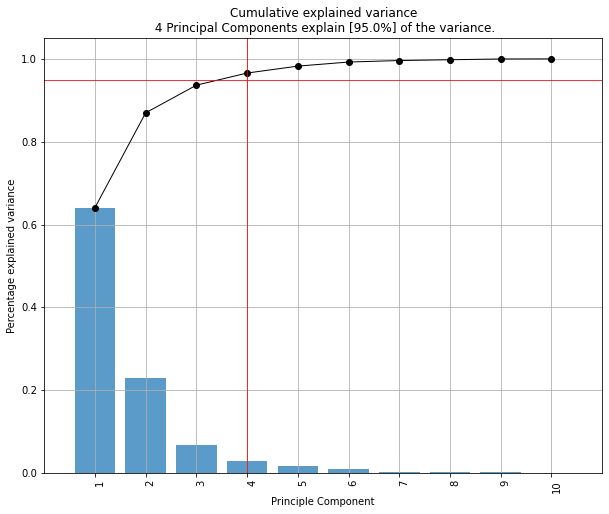

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 4 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [6]:
model.plot()

En el gráifco anterior de puede ver que los dos primeros componentes principales tienen más de un 80% de la varianza de los datos totales, preservando la mayoría de la información de los respectivos índices sociales de México.

### Loading

El loading en PCA se refiere a los coeficientes de cada variable original en la nueva base de componentes principales. Estos coeficientes indican qué tanto una variable original contribuye a cada componente principal, y por lo tanto pueden ayudar a entender qué variables están relacionadas entre sí y cómo estas variables están distribuidas en el espacio de datos. 
Por ejemplo, si dos variables tienen loadings altos en el mismo componente principal, significa que estas variables están altamente correlacionadas y que varían juntas en el espacio de datos. Por otro lado, si dos variables tienen loadings bajos en el mismo componente principal, significa que estas variables están poco correlacionadas y que varían de manera independiente en el espacio de datos.
Además, el signo indica si la correlación de la variable y el componente principal es positiva o negativa.

In [7]:
# Se muestran las caracteristicas y el componente principal asociado con la loading
# respectiva, esto es, la relación qur tiene con el componente principal
print(out['topfeat'])

      PC                   feature   loading  type
0    PC1           num_army_forces -0.448125  best
1    PC2     expenditure_education -0.510764  best
2    PC3           Index_democracy -0.709627  best
3    PC4                      PISA -0.605771  best
4    PC5                  Index_hr -0.593092  best
5    PC6      military_expenditure  0.671106  best
6    PC7  Gini_economic_inequality  0.589152  best
7    PC8           num_army_forces -0.543030  best
8    PC9       Population_internet -0.683264  best
9   PC10                Emigration  0.817701  best
10   PC6          Index_corruption  0.621167  weak


Se puede observar que mayoria de la varianza del primer componente principal proviene de
la variable ___num_army_forces___ que es el número de fuerza armadas militares en México. Esta variable tiene una correlación negativa con el componente principal.

Por otra parte, la variable ___expenditure_education___ es la que mayor varianza aporta al segundo componente principal igualmente con correlación negativa.

Esto se traduce a que de todos los índices sociales analizados, en México, las caracteristicas sociales más relevantes son el número de fuerzas armadas y el gasto en educación, sin embargo, dado que la correación es negativa en ambas variables, si alguna de ellas disminuye tambien lo hace la varianza del componente principal respectivo y esto implicaria un cambio en la estructura de los datos, requiriendo un nuevo análisis.

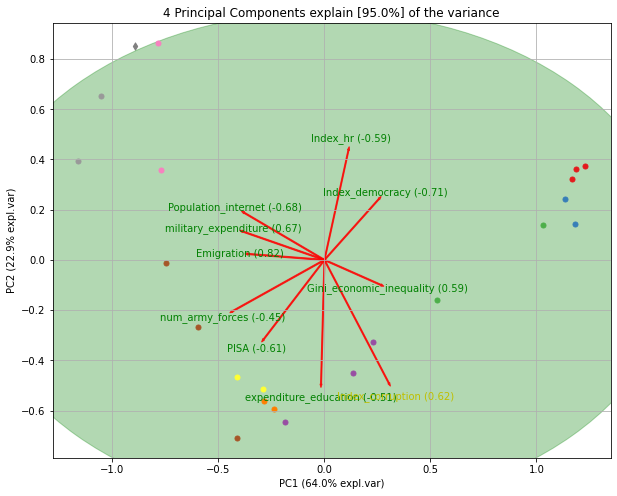

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (64.0% expl.var)', ylabel='PC2 (22.9% expl.var)'>)

In [8]:
model.biplot(legend=False, SPE=True, hotellingt2=True, label = False)

En la gráfica anterior se puede observar que que las caracteristicas que están en el mismo cuadrante que la variable ___PISA___ son el número de fuerzas armadas en México y el gasto en educación, siendo estas, además, las caracteristicas que más varianza aportan a los dos primeros componentes principales.

Esto quiere decir que estas variables estan altamente correlacionadas entre sí o que hay algún patrón subyacente entre ellas ya que están capturando la misma información o varianza en los datos originales, esto puede deberse a que tienen un patrón de variación similar.

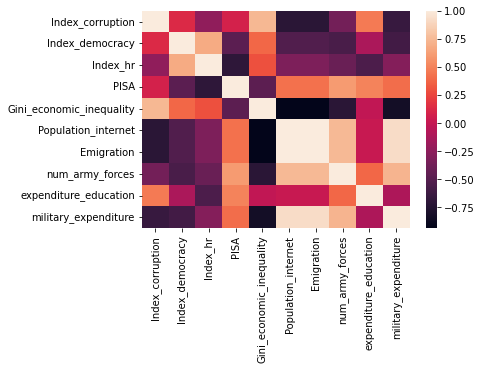

In [9]:
import seaborn as sb
dataplot=sb.heatmap(df_normal.corr(method='spearman'))

In [10]:
corr = df_normal.corr(method = 'spearman').round(2)
corr["PISA"]

Index_corruption            0.08
Index_democracy            -0.48
Index_hr                   -0.69
PISA                        1.00
Gini_economic_inequality   -0.47
Population_internet         0.43
Emigration                  0.43
num_army_forces             0.60
expenditure_education       0.49
military_expenditure        0.41
Name: PISA, dtype: float64

En el mapa de calor anterior se calcula la correlación de todas las variables y en particular se muestra la correlación de la puntuación PISA con las demás caracteristicas. Se puede observar que de un rango de -1 a 1 el número de fuerzas armadas tiene una correlación de 0.6 positiva, y que el gasto en educación tiene una correlación de 0.49 postiva con respecto a la puntuación en matemáticas, mostrando que hay una relación moderada. 

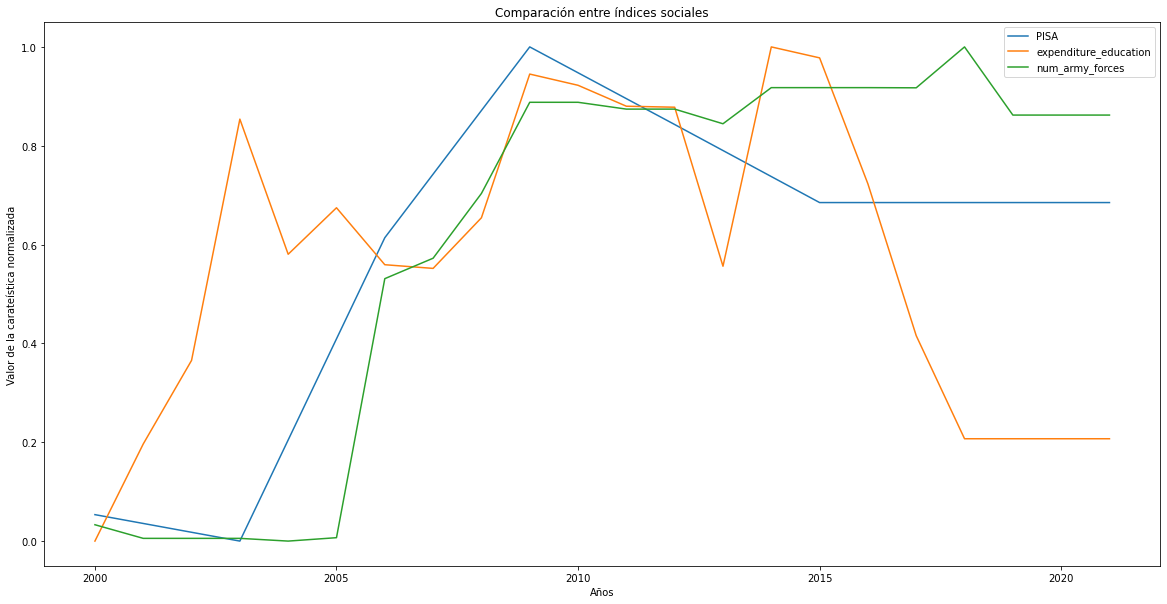

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

legend = ["PISA", "expenditure_education", "num_army_forces"]
plt.plot(df_normal["PISA"])
plt.plot(df_normal["expenditure_education"])
plt.plot(df_normal["num_army_forces"])
plt.title('Comparación entre índices sociales')
plt.ylabel('Valor de la carateística normalizada')
plt.xlabel('Años')


plt.legend(legend)
plt.show()

Gráficando las carateristicas se puede notar que siguen un mismo patrón, ya que al subir o bajar uno también lo hacen las demás. Compronado así que existe algún patrón de comportamiento subyancente en estas variables como mostraba el PCA y la correlación.

## Conlusiones

Del análisis hecho se puede concluir que de los diez índices sociales de México extraídos de la página Our World Data, el número de fuerzas armadas y el gasto en educación son las características con mayor peso en los datos con respecto a la varianza, ya que son las variables que más cargan los componentes principales en dos dimensiones, qué además, logran explicar poco más de un 85% de la varianza total de los datos.

Por otro lado, resulta que estas mismas características están en el mismo cuadrante que la puntuación PISA de matemáticas en México y que en adición se correlacionan moderadamente y de forma positiva, mostrando que hay un patrón subyacente en las mismas.

De lo anterior podría decirse que un aumento en el gasto de educación genera un aumento en la puntuación PISA, sin embargo, resulta contradictorio decir que un aumento en el número de fuerzas armadas generaría un aumento en la destreza matemática de los adolescentes, por ello es importante mencionar que correlación no implica causalidad y que habría que hacer un análisis más profundo de los datos. 


## Límitaciones del análisis

Algunas limitaciones del análisis son las siguientes:

- Análisis con poca cantidad de índices sociales del país
- Pocos registros históricos para cada índice social
- Se realizó interpolación lineal para rellenar los datos faltantes, pudiendo esto afectar la calidad de los dato
